In [1]:
import pandas as pd


In [2]:
df = pd.read_excel("kenya-accidents-database2.xlsx")


In [3]:
df.head()


,TIME 24 HOURS,BASE/SUB BASE,COUNTY,ROAD,PLACE,BRIEF ACCIDENT DETAILS,GENDER,AGE,CAUSE CODE,VICTIM,NO.,Date DD/MM/YYYY,Unnamed: 12
0,630,KITUI,MAKUENI,KITUI-ITHOKWE,KITUI SCHOOL,HEAD ON COLLISION,M,26,7.0,M/CYCLIST,1,2016-06-25,so MM/DD/YYYY is the solution :)
1,830,VOI,TAITA TAVETA,MOMBASA-NAIROBI,IKANGA,HEAD ON COLLISION,M,28,25.0,M/CYCLIST,1,2016-06-25,NaN
2,1330,MARIAKANI,KILIFI,MOMBASA-NAIROBI,KATOLANI,THE UNKNOWN M/V HIT THE MOTOR CYCLE,M,A & J,98.0,M/CYCLIST,1,2016-06-25,NaN
3,2100,ONGATA RONGAI,NAKURU,NAKURU-NAIROBI,MAASAI LODGE,THE VEHICLE KNOCKED DOWN A PEDESTRIAN WHO WAS ...,M,65,29.0,PEDESTRIAN,1,2016-06-25,NaN
4,1900,MATUU,MACHAKOS,MATUU-MWINGI,KIVANDINI,THE VEHICLE OVERTOOK A M/CYCLE AND LOST CONTRO...,M,A,10.0,PASSENGER,1,2016-06-25,NaN


In [4]:
gender_counts = df['GENDER'].value_counts()

print("Number of Males:", gender_counts['M'])
print("Number of Females:", gender_counts['F'])

Number of Males: 321
Number of Females: 51


In [5]:
base_counts = df['BASE/SUB BASE'].value_counts()

most_common_base = base_counts.idxmax()
count_of_most_common_base = base_counts.max()

print("The base that appears the most is:", most_common_base)
print("It appears", count_of_most_common_base, "times.")


The base that appears the most is: NAKURU
It appears 12 times.


In [6]:
pedestrian_accidents = df[df['VICTIM'] == 'PEDESTRIAN']

print(pedestrian_accidents)

    TIME 24 HOURS   BASE/SUB BASE    COUNTY                ROAD  \
3            2100   ONGATA RONGAI    NAKURU      NAKURU-NAIROBI   
5            2130          NYANDO  HOMA BAY    KATITO-KENDU BAY   
8            1930          KAYOLE   NAIROBI     EASTERN BY PASS   
12             40          NAKURU    NAKURU      NAKURU-NAIROBI   
15            330          MIGORI    MIGORI        MIGORI KISII   
..            ...             ...       ...                 ...   
365          1945   DTEO DAGORETI   NAIROBI         WAIYAKI WAY   
366          2030          KIAMBU    KIAMBU     NDUMBERI KANNGA   
367          2215  DTEO MAKINGENI   NAIROBI             HESHIMA   
373          2110            JUJA    KIAMBU  THIKA SUPERHIGHWAY   
377          2230       MAKONGENI   NAIROBI          JOGOO ROAD   

                           PLACE  \
3                   MAASAI LODGE   
5                     PAP ONDITI   
8       NEAR GULF PETROL STATION   
12          NEAR GREEN STED AREA   
15             

In [7]:
female_victims_df = df[df['GENDER'] == 'F']

female_victims_by_base = female_victims_df['BASE/SUB BASE'].value_counts()

base_highest_female_victims = female_victims_by_base.idxmax()

print("Base with the highest number of female accident victims:", base_highest_female_victims)

Base with the highest number of female accident victims: BONDO


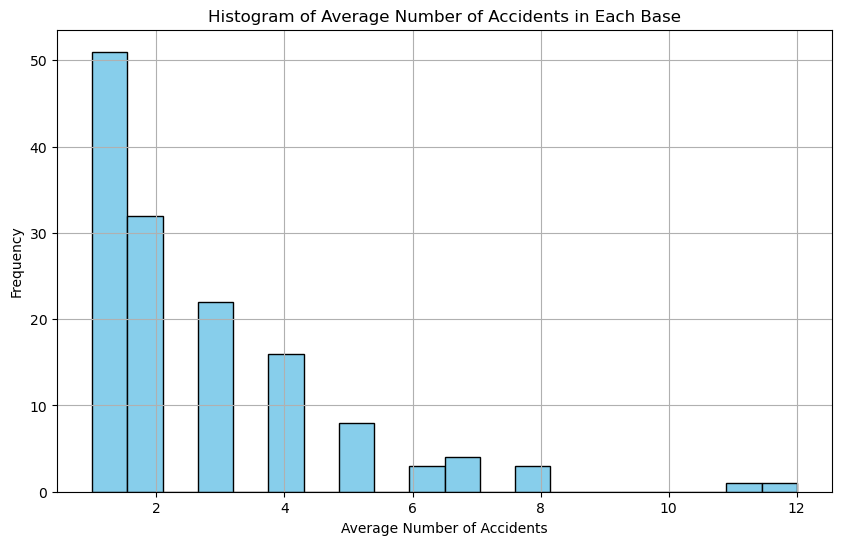

In [9]:
import matplotlib.pyplot as plt
accidents_by_base = df.groupby('BASE/SUB BASE').size()

plt.figure(figsize=(10, 6))
accidents_by_base.plot(kind='hist', bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Average Number of Accidents in Each Base')
plt.xlabel('Average Number of Accidents')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [12]:
accidents_frequency_by_base = df.groupby('BASE/SUB BASE')['BRIEF ACCIDENT DETAILS'].count()

average_accidents = accidents_frequency_by_base.mean()

for base, frequency in accidents_frequency_by_base.items():
    print(f"Base/Sub Base: {base}, Average Accidents: {frequency:.2f}")

print(f"Overall Average Accidents: {average_accidents:.2f}")



Base/Sub Base: ATHI RIVER, Average Accidents: 3.00
Base/Sub Base: AWENDO, Average Accidents: 2.00
Base/Sub Base: BARINGO, Average Accidents: 3.00
Base/Sub Base: BOMET, Average Accidents: 2.00
Base/Sub Base: BONDO, Average Accidents: 4.00
Base/Sub Base: BUNGOMA, Average Accidents: 7.00
Base/Sub Base: BURETI, Average Accidents: 3.00
Base/Sub Base: BURUBURU, Average Accidents: 2.00
Base/Sub Base: BUSIA, Average Accidents: 3.00
Base/Sub Base: CENTRAL, Average Accidents: 4.00
Base/Sub Base: CHANGAMWE, Average Accidents: 5.00
Base/Sub Base: DAGORETI, Average Accidents: 2.00
Base/Sub Base: DAGORETTI, Average Accidents: 1.00
Base/Sub Base: DIANI, Average Accidents: 3.00
Base/Sub Base: DTEO BURUBURU, Average Accidents: 1.00
Base/Sub Base: DTEO CENTRAL, Average Accidents: 3.00
Base/Sub Base: DTEO DAGORETI, Average Accidents: 1.00
Base/Sub Base: DTEO GIGIRI, Average Accidents: 1.00
Base/Sub Base: DTEO KAREN, Average Accidents: 1.00
Base/Sub Base: DTEO KASARANI, Average Accidents: 1.00
Base/Sub Ba

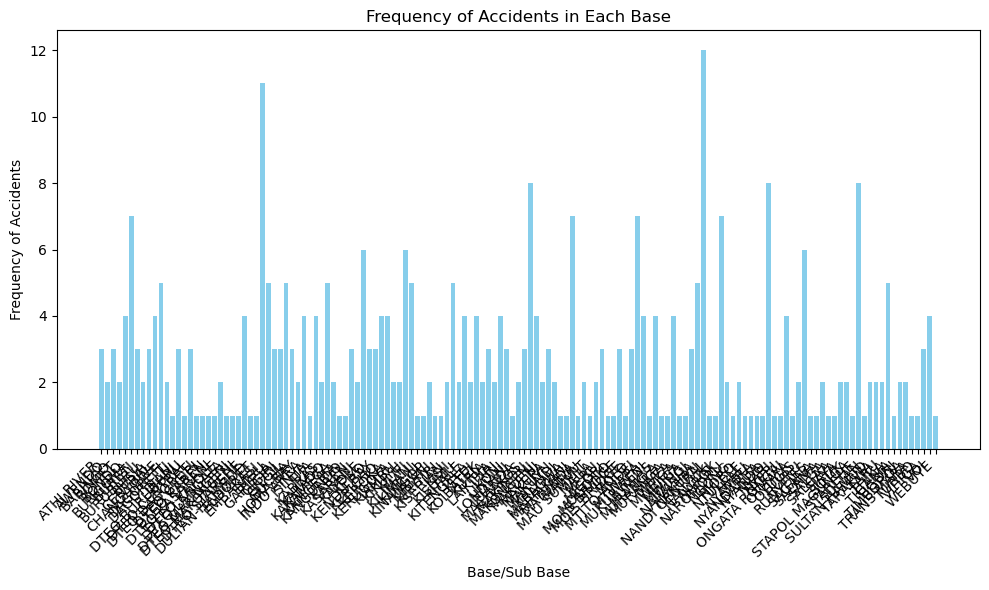

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel("kenya-accidents-database2.xlsx")

accidents_frequency_by_base = df.groupby('BASE/SUB BASE')['BRIEF ACCIDENT DETAILS'].count()

plt.figure(figsize=(10, 6))
plt.bar(accidents_frequency_by_base.index, accidents_frequency_by_base.values, color='skyblue')
plt.title('Frequency of Accidents in Each Base')
plt.xlabel('Base/Sub Base')
plt.ylabel('Frequency of Accidents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Number of accidents for each month:
Month
2      13
3     144
4      12
5      70
6      51
7     169
8     130
9      66
10     62
11     23
Name: count, dtype: int64


In [35]:
import pandas as pd

df = pd.read_csv("kenya-accidents-database233.csv")

df['Date DD/MM/YYYY'] = pd.to_datetime(df['Date DD/MM/YYYY'], format='%d/%m/%Y')

df['Month'] = df['Date DD/MM/YYYY'].dt.strftime('%B')

accidents_by_month = df['Month'].value_counts().sort_index()

print("Number of accidents for each month:")
print(accidents_by_month)


Number of accidents for each month:
Month
April         12
August       130
February      13
July         169
June          51
March        144
May           70
November      23
October       62
September     66
Name: count, dtype: int64


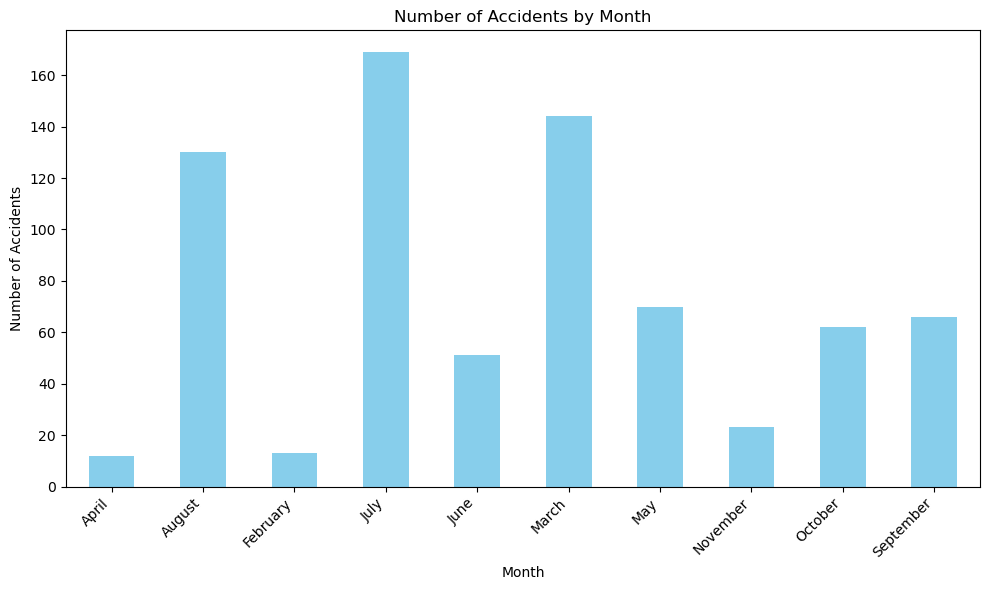

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("kenya-accidents-database233.csv")

df['Date DD/MM/YYYY'] = pd.to_datetime(df['Date DD/MM/YYYY'], format='%d/%m/%Y')

df['Month'] = df['Date DD/MM/YYYY'].dt.strftime('%B')

accidents_by_month = df['Month'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
accidents_by_month.plot(kind='bar', color='skyblue')
plt.title('Number of Accidents by Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
